<a href="https://colab.research.google.com/github/edleafvirtual/Iowa_Liquor_Sales/blob/main/Core_Project_2_Iowa_Liquor_Sales_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Project Name:  Iowa Liquor Sales.
- **Student Name:** Eduardo Galindez.
- **Coding Dojo Bootcamp:** Data Science.
  - **Stack:** Machine Learning.
- **Date:** August, 2022.

#B. Project Objective

Prepare the data for Machine Learning to predict [Iowa Alcoholic Beverages Division 2022](https://abd.iowa.gov/) income from Class E alcohol liquor sales across licensed vendors using historical data (2019, 2020, and 2021) from [Iowa Liquor Sales](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=lively-clover-358509).

#C. Project Statement

In general, when a [Licensed Vendor](https://abd.iowa.gov/licensing/licensepermit-fees) sells alcoholic liquor to a store, this is the one who pays to Iowa State the fee per bottle sold (column 'State Bottle Retail' in our dataset).


There are a few concepts/elements that we should clarify:
- Class E is the license to sell an unopened alcoholic liquor bottle off-premises in Iowa.
- The 'State Bottle Retail' is a fee based on the size of the 'Pack' and the 'Bottle Volume (ml)'.
- The ' Sale (Dollars)' is 'Bottles Sold' times 'State Bottle Retail'.
  - This is the amount the stores pay to the [Iowa Alcoholic Beverages Division](https://abd.iowa.gov/sites/default/files/listing_manual_011717.pdf) per bottle sold. It's not the income per sale for store/vendor.
- 'Volume Sold (Gallons)' represents gallons sold by a transaction (row).

The main [dataset](https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy) has 24+ million rows, which includes the sales from January 1st, 2012 to current, making it pretty hard to work with Google Colaboratory. The next graphs would help us to visually describe why we limited our analysis to the past three years, in order to use Google Colaboratory as a notebook:


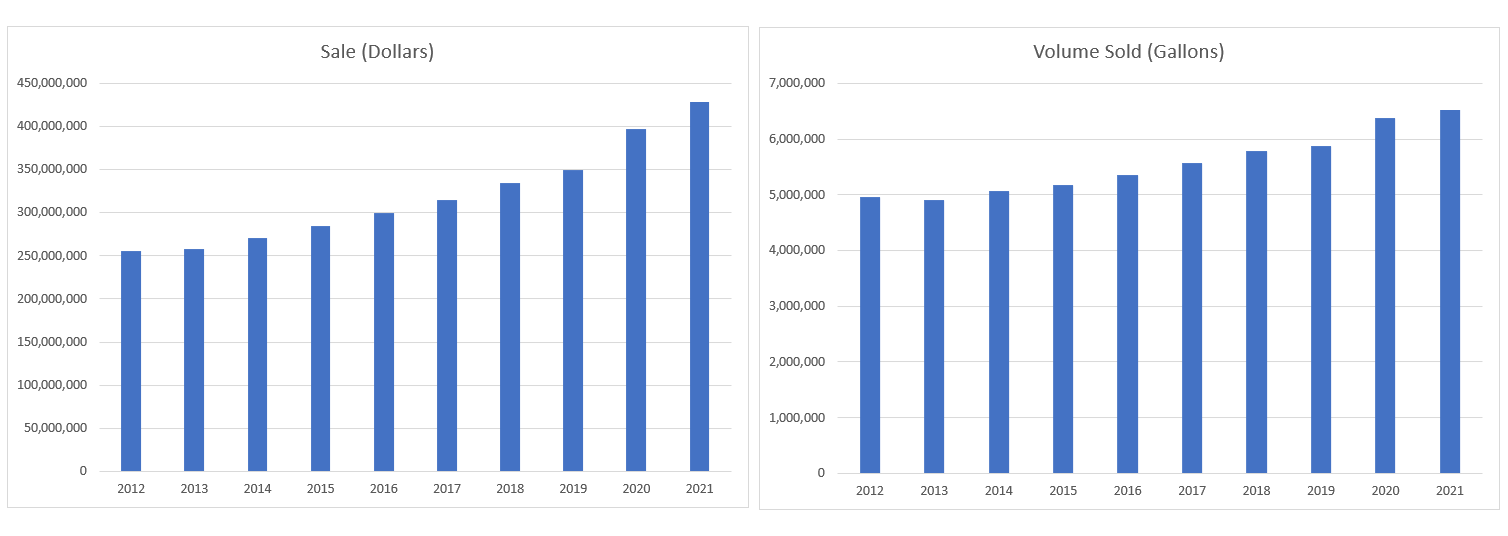

During Section 3, we will be working on determining which column should be our target: 'Sale (Dollars)' or 'Volume Sold (Gallons). On the one hand, the first choice appears to have a better correlation with the dataset, while on the other hand, 'Volume Sold (Gallons)' is a variable that could be used as a reference by the Iowa Alcoholic Beverage Division in case they wish to predict income by modifying the fees ('State Bottle Retail').





#D. Project Development

##1.- Libraries

In [56]:
# Importing libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from matplotlib.ticker import PercentFormatter

##2.-  Loading Data

###2.1.- Mount and loading
- We downloaded 3 CSV files, one per year: [2019](https://data.iowa.gov/Sales-Distribution/2019-Iowa-Liquor-Sales/38x4-vs5h), [2020](https://data.iowa.gov/Sales-Distribution/2020-Iowa-Liquor-Sales/ktcd-5fm8), and [2021](https://data.iowa.gov/Sales-Distribution/2021-Iowa-Liquor-Sales/cc6f-sgik). Those will be [concatenated](https://pandas.pydata.org/docs/user_guide/merging.html) in order to have a new dataset including the years to work with. 

In [2]:
# Mount data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load data from 2019.
df2019 = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/2. Machine Learning/Week 4/2019_Iowa_Liquor_Sales.csv')

In [4]:
# Load data from 2020.
df2020 = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/2. Machine Learning/Week 4/2020_Iowa_Liquor_Sales.csv')

In [5]:
# Load data from 2021.
df2021 = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/2. Machine Learning/Week 4/2021_Iowa_Liquor_Sales.csv')

In [6]:
# Let's concatenate 3 datasets.
dfsets = [df2019, df2020, df2021]
df = pd.concat(dfsets, keys=["2019", "2020", "2021"])

In [7]:
# Let's display our new dataset.
df.head(10)

Invoice/Item Number        Date  Store Number  \
2019 0     INV-16681900011  01/02/2019          5286   
     1     INV-16681900027  01/02/2019          5286   
     2     INV-16681900018  01/02/2019          5286   
     3     INV-16685400036  01/02/2019          2524   
     4     INV-16690300035  01/02/2019          4449   
     5     INV-16685400064  01/02/2019          2524   
     6     INV-16685400008  01/02/2019          2524   
     7     INV-16685400039  01/02/2019          2524   
     8     INV-16693100041  01/02/2019          5151   
     9     INV-16692900004  01/02/2019          4116   

                         Store Name             Address       City  Zip Code  \
2019 0                        Sauce        108, College  Iowa City   52240.0   
     1                        Sauce        108, College  Iowa City   52240.0   
     2                        Sauce        108, College  Iowa City   52240.0   
     3  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     4    Kum & Go #121 / Urbandale  12041 Douglas Pkwy  Urbandale   50322.0   
     5  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     6  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     7  Hy-Vee Food Store / Dubuque       3500 Dodge St    Dubuque   52001.0   
     8                   IDA Liquor        500, Hwy 175  Ida Grove   51445.0   
     9              Lake View Foods         223 Main St  Lake View   51450.0   

       Store Location  County Number   County  ...  Item Number  \
2019 0            NaN           52.0  JOHNSON  ...        48099   
     1            NaN           52.0  JOHNSON  ...        89191   
     2            NaN           52.0  JOHNSON  ...         8824   
     3            NaN           31.0  DUBUQUE  ...        35917   
     4            NaN           77.0     POLK  ...        36304   
     5            NaN           31.0  DUBUQUE  ...        63355   
     6            NaN           31.0  DUBUQUE  ...        11297   
     7            NaN           31.0  DUBUQUE  ...        36307   
     8            NaN           47.0      IDA  ...        15248   
     9            NaN           81.0      SAC  ...        43126   

                          Item Description  Pack Bottle Volume (ml)  \
2019 0                         Hennessy VS    24                200   
     1  Jose Cuervo Especial Reposado Mini    12                500   
     2                            Lauder's    24                375   
     3                  Five O'Clock Vodka    12               1000   
     4                       Hawkeye Vodka    24                375   
     5                Skinnygirl Margarita    12                750   
     6                         Crown Royal    12               1000   
     7                       Hawkeye Vodka    12               1000   
     8                Windsor Canadian PET     6               1750   
     9                    Bacardi Superior    12                750   

        State Bottle Cost State Bottle Retail  Bottles Sold  Sale (Dollars)  \
2019 0               6.24                9.36            24          224.64   
     1              11.50               17.25            12          207.00   
     2               3.21                4.82            24          115.68   
     3               4.17                6.26            12           75.12   
     4               1.86                2.79            24           66.96   
     5               6.29                9.44             6           56.64   
     6              18.89               28.34            24          680.16   
     7               4.05                6.08            36          218.88   
     8               9.50               14.25             6           85.50   
     9               8.26               12.39            12          148.68   

        Volume Sold (Liters)  Volume Sold (Gallons)  
2019 0                   4.8                   1.26  
     1     

###2.2.- Data dictionary

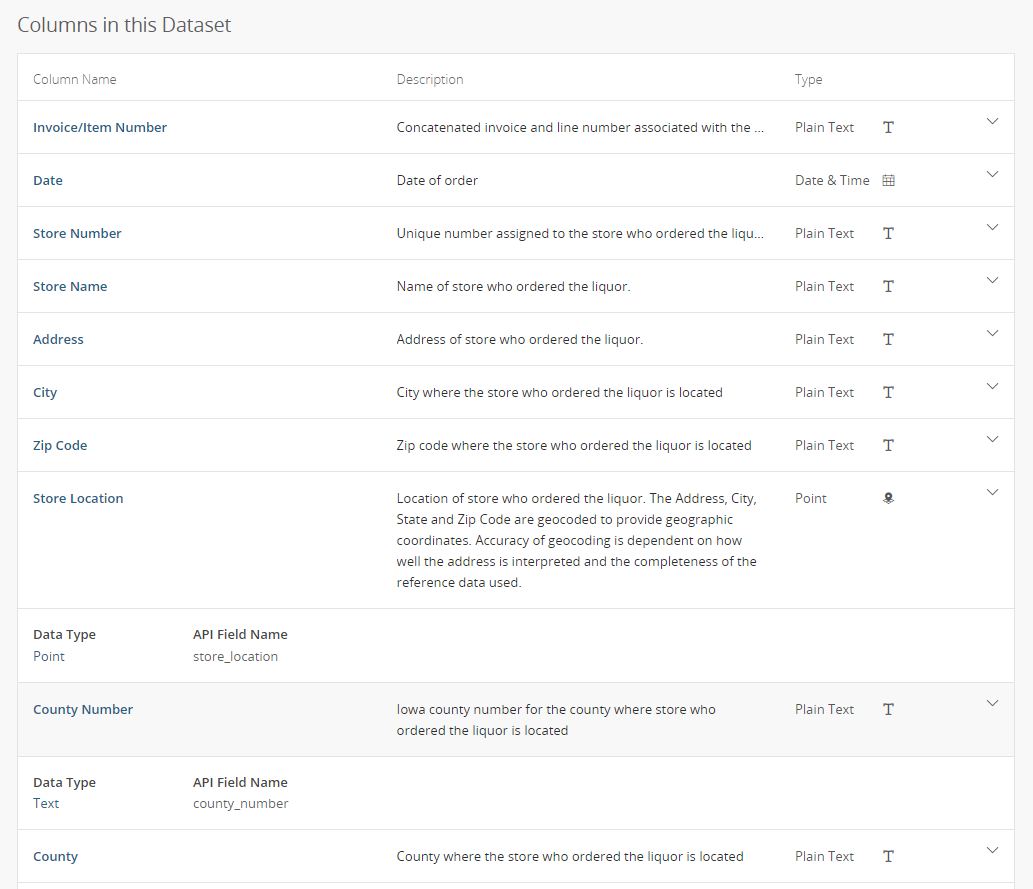


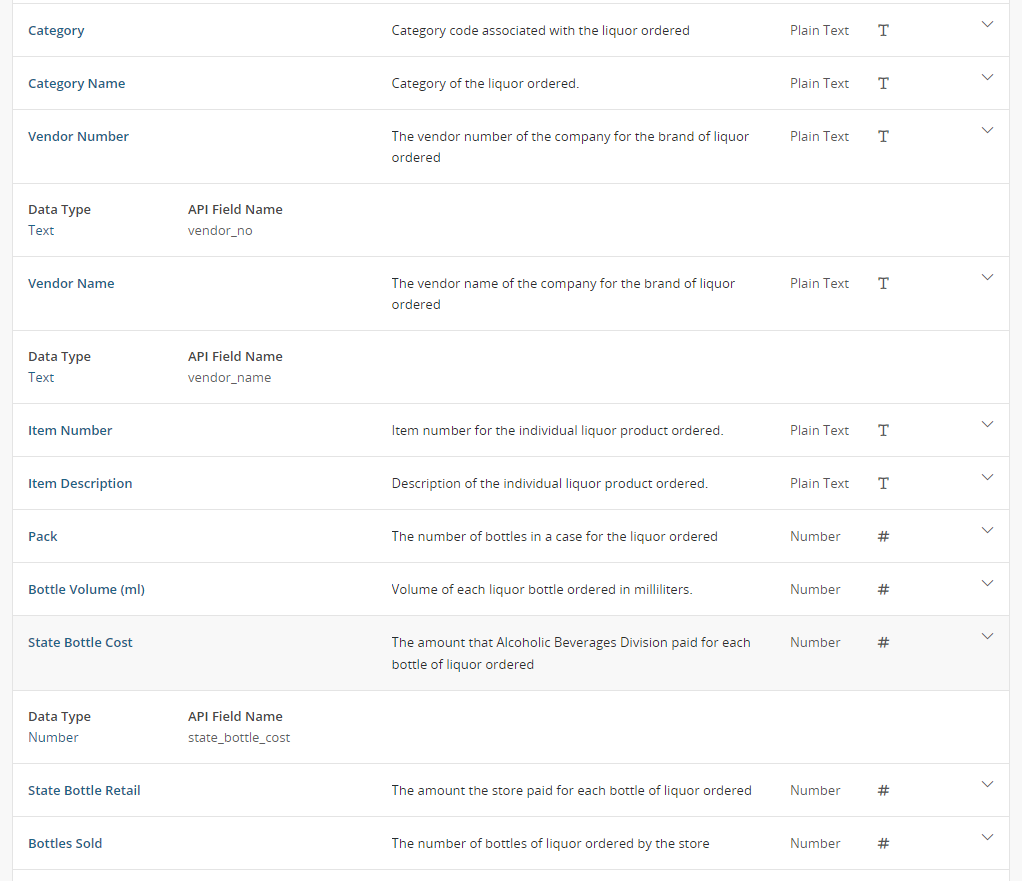

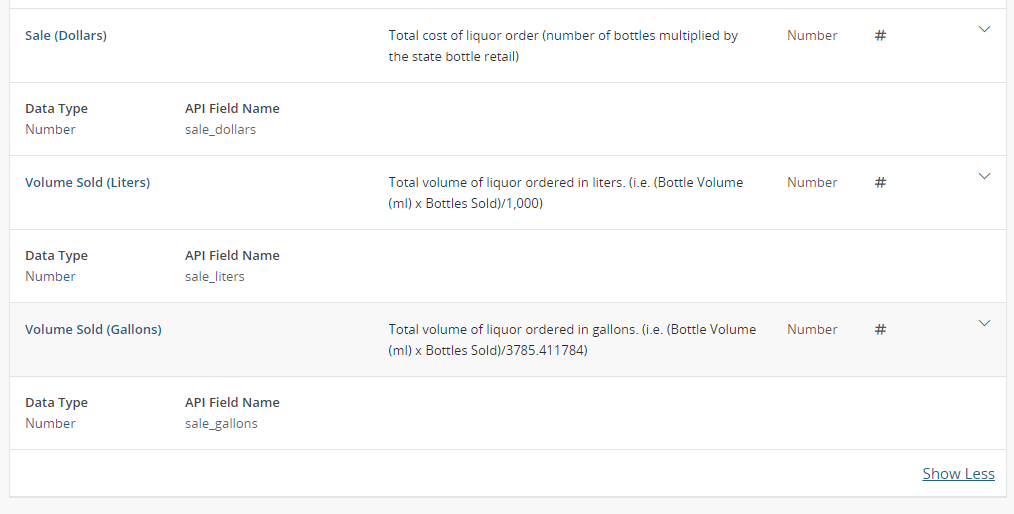

##3.- Data Understanding

In [8]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7617422 entries, ('2019', 0) to ('2021', 2622711)
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22

In [9]:
# Let's display the size of our dataframe.
df.shape

(7617422, 24)

In [10]:
# Looking for unique values per variable.
df.nunique()

Invoice/Item Number      7617422
Date                         828
Store Number                2127
Store Name                  2145
Address                     2082
City                         449
Zip Code                     484
Store Location              2674
County Number                 99
County                       129
Category                      59
Category Name                 59
Vendor Number                278
Vendor Name                  300
Item Number                 6224
Item Description            5857
Pack                          22
Bottle Volume (ml)            36
State Bottle Cost           1739
State Bottle Retail         1743
Bottles Sold                 498
Sale (Dollars)             15690
Volume Sold (Liters)        1067
Volume Sold (Gallons)       1050
dtype: int64

In [11]:
# Let's check the statistical summary.
df.describe().round(2)

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,7617422.00,7612381.00,7612381.00,7613822.00,7617417.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00,7617422.00
mean,4016.56,51255.41,57.31,1054052.27,275.06,51353.79,12.16,845.85,10.86,16.28,11.54,154.12,9.36,2.47
std,1205.81,990.42,27.28,98659.80,140.56,79954.17,8.01,525.88,9.89,14.84,33.47,540.30,39.69,10.48
min,2106.00,50002.00,1.00,1011000.00,33.00,159.00,1.00,20.00,0.33,0.50,1.00,1.30,0.02,0.00
25%,2633.00,50315.00,31.00,1012200.00,205.00,27037.00,6.00,600.00,5.78,8.67,3.00,38.40,1.50,0.39
50%,4092.00,51055.00,63.00,1031200.00,260.00,39422.00,12.00,750.00,8.74,13.11,6.00,81.27,4.80,1.26
75%,5102.00,52302.00,77.00,1062500.00,395.00,64870.00,12.00,1000.00,13.50,20.25,12.00,161.64,10.50,2.77
max,9946.00,57222.00,99.00,1901200.00,978.00,999993.00,120.00,6000.00,2098.94,3148.41,13200.00,250932.00,13200.00,3487.07


In [12]:
# Looking for missing data.
df.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    5041
City                       5041
Zip Code                   5041
Store Location           767816
County Number              5041
County                     5041
Category                   3600
Category Name              3600
Vendor Number                 5
Vendor Name                   5
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

In [13]:
df.isna().sum().sum()

800231

In [14]:
# Let's identify duplicate data.
df.duplicated().sum()

0

In [ ]:
# Identify inconsistencies in our 'object' columns.
pd.set_option('display.max_rows', None)
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('\n')

*- The output for this code is not going to be showing here for aesthetic reasons: GitHub shows the whole list.*

*- Suggestion: to see the result/output, open the document in your favorite notebook to run the code.*


**Observations:**
- We must keep in mind that the project objective is to predict the sales (Gallons or $$) for 2022. For this reason, we decided to drop the columns we consider don't affect the sales:
  - Invoice/Item Number.
  - Date.
  - Store Number.
  - Store Name.
  - Address.
  - Zip Code.
  - Store Location.
  - Category.
  - County Number.
  - Vendor Number.
  - Item Number.
  - Item Description. It's a variable that could affect the sales from consumer point of view, but like in this case we are focusing in the global sales instead per product, this column will be droped too.

- According to the code above, our current dataset has:
  - 7,617,422 rows and 24 columns.
  - Around 10% of missing data (800,231).
    - The majority of the missing data is located in rows that will be dropped.
    - The good new is that we don't have missing data on both possible target columns ('Sale (Dollars)' & 'Volume Sold (Gallons)').
  - 0 duplicate data.
    - Duplicate data is a value that won't be calculated on future code, because after eliminate unique elements the probability to have rows with equal values is high.
  - We identify some inconsistencies in dtype object columns but after dropping the columns describe above, we are going to check this parameter again and fix any inconsistency on features.

##4.- Data Cleaning
- In this section, we are going to prepare the data to have it clean and ready for the split between Features (X) and Target (y).

In [16]:
# Drop unnecessary columns.
df.drop(columns = ['Invoice/Item Number', 'Date', 'Store Number',
                   'Store Name', 'Address', 'Zip Code',
                   'Store Location', 'Category', 'County Number',
                   'Vendor Number', 'Item Number', 'Item Description'],
        inplace = True)
df.head(5)

City   County      Category Name            Vendor Name  Pack  \
2019 0  Iowa City  JOHNSON  Imported Brandies      MOET HENNESSY USA    24   
     1  Iowa City  JOHNSON      Mixto Tequila                PROXIMO    12   
     2  Iowa City  JOHNSON    Scotch Whiskies  SAZERAC NORTH AMERICA    24   
     3    Dubuque  DUBUQUE    American Vodkas        Laird & Company    12   
     4  Urbandale     POLK    American Vodkas              LUXCO INC    24   

        Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
2019 0                 200               6.24                 9.36   
     1                 500              11.50                17.25   
     2                 375               3.21                 4.82   
     3                1000               4.17                 6.26   
     4                 375               1.86                 2.79   

        Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
2019 0            24          224.64                   4.8   
     1            12          207.00                   6.0   
     2            24          115.68                   9.0   
     3            12           75.12                  12.0   
     4            24           66.96                   9.0   

        Volume Sold (Gallons)  
2019 0                   1.26  
     1                   1.58  
     2                   2.37  
     3                   3.17  
     4                   2.37

In [17]:
# Looking for missing data.
df.isna().sum()

City                     5041
County                   5041
Category Name            3600
Vendor Name                 5
Pack                        0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [18]:
df.isna().sum().sum()

13687

In [ ]:
# Identify inconsistencies in our 'object' columns.
pd.set_option('display.max_rows', None)
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())
  print('\n')

*- The output for this code is not going to be showing here for aesthetic reasons: GitHub shows the whole list.*

*- Suggestion: to see the result/output, open the document in your favorite notebook to run the code.*

In [20]:
# Let's have a closer look in 'Category Name'.
df.groupby('Category Name').agg(value_count=('Category Name', 'count')).sort_values(by=['Category Name', 'value_count'], ascending=[True,False]) 
                                             # code adopted from https://www.appsloveworld.com/pandas/100/419/pandas-dataframe-how-to-sort-alphabetically-column-values-with-value-counts

,value_count
Category Name,
100% Agave Tequila,235692
Aged Dark Rum,23029
American Brandies,216773
American Cordials & Liqueur,176094
American Cordials & Liqueurs,771
American Distilled Spirit Specialty,19957
American Distilled Spirits Specialty,61
American Dry Gins,138632
American Flavored Vodka,356091


In [21]:
# Let's have a closer look in 'City'.
df.groupby('City').agg(value_count=('City','count')).sort_values(by=['City','value_count'], ascending=[True,False])

,value_count
City,
Ackley,1599
Adair,2706
Adel,12785
Afton,1036
Akron,1358
Albert City,376
Albia,9739
Albion,519
Alburnett,357


In [22]:
# Let's have a closer look in 'County'.
df.groupby('County').agg(value_count=('County','count')).sort_values(by=['County','value_count'], ascending=[True,False])

,value_count
County,
ADAIR,12031
ADAMS,6596
ALLAMAKEE,29953
APPANOOSE,23769
AUDUBON,9968
Adair,2483
BENTON,43828
BLACK HAWK,425752
BOONE,53337


In [23]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7617422 entries, ('2019', 0) to ('2021', 2622711)
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   City                   object 
 1   County                 object 
 2   Category Name          object 
 3   Vendor Name            object 
 4   Pack                   int64  
 5   Bottle Volume (ml)     int64  
 6   State Bottle Cost      float64
 7   State Bottle Retail    float64
 8   Bottles Sold           int64  
 9   Sale (Dollars)         float64
 10  Volume Sold (Liters)   float64
 11  Volume Sold (Gallons)  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 818.2+ MB


**Observations:**
- According to the code above:
  - Missing data:
    - In total, we have around ~ 0.2% missing data. We have decided to drop them because of the minimal impact on our dataset.
  - Inconsistencies in categorical features:
    - In 'Categorical Name' and 'City' we found some misspellings.
    - In 'County' words in capitalized instead of the mayor.
  - Data type:
    - Any issue to be fixed.
- All the issues pointed will be addressed in code below.

In [24]:
# Let's follow the procedure indicated above.
df.dropna(inplace=True)

In [25]:
# Confirm there is not missing data.
df.isna().sum()

City                     0
County                   0
Category Name            0
Vendor Name              0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [26]:
df.isna().sum().sum()

0

In [27]:
# Let's address the inconsistencies found in 'Category Name'.
plural_fix = {'American Cordials & Liqueurs':'American Cordials & Liqueur',
              'American Distilled Spirits Specialty': 'American Distilled Spirit Specialty',
              'American Vodkas': 'American Vodka',
              'Cocktails /RTD': 'Cocktails / RTD',
              'Imported Cordials & Liqueurs': 'Imported Cordials & Liqueur',
              'Imported Distilled Spirits Specialty': 'Imported Distilled Spirit Specialty',
              'Imported Vodkas': 'Imported Vodka',
              'Temporary &  Specialty Packages': 'Temporary & Specialty Packages',
              'Temporary  & Specialty Packages': 'Temporary & Specialty Packages'}

df['Category Name'] = df['Category Name'].replace(plural_fix)

In [28]:
# Let's address the inconsistencies found in 'City'.
city_fix = {"Arnold's Park": 'Arnolds Park',
            'ClearLake': 'Clear Lake'}

df['City'] = df['City'].replace(city_fix)
df['City'] = df['City'].str.upper()

In [29]:
# Let's address the inconsistencies found in 'County'.
df['County']  = df['County'].str.upper()

In [30]:
# Let's confirm issues are fixed.
print("\033[1mCategories of 'Category Name':\n\033[0;0m", df['Category Name'].unique())
print("\n\n\033[1mCategories of 'City':\n\033[0;0m", df['City'].unique())
print("\n\n\033[1mCategories of 'County':\n\033[0;0m", df['County'].unique())

Categories of 'Category Name':
 ['Imported Brandies' 'Mixto Tequila' 'Scotch Whiskies' 'American Vodka'
 'Cocktails / RTD' 'Canadian Whiskies' 'White Rum' 'Whiskey Liqueur'
 'Cream Liqueurs' 'Blended Whiskies' 'Imported Schnapps' 'Flavored Rum'
 'Imported Vodka' 'Straight Bourbon Whiskies'
 'American Cordials & Liqueur' 'American Dry Gins' 'Single Malt Scotch'
 'American Flavored Vodka' '100% Agave Tequila' 'Irish Whiskies'
 'American Schnapps' 'Tennessee Whiskies' 'Imported Flavored Vodka'
 'Imported Cordials & Liqueur' 'Imported Dry Gins'
 'Temporary & Specialty Packages' 'American Brandies' 'Gold Rum'
 'Flavored Gin' 'Spiced Rum' 'American Distilled Spirit Specialty'
 'Imported Distilled Spirit Specialty' 'Neutral Grain Spirits'
 'Straight Rye Whiskies' 'Aged Dark Rum' 'Neutral Grain Spirits Flavored'
 'Corn Whiskies' 'Triple Sec' 'Coffee Liqueurs' 'Bottled in Bond Bourbon'
 'American Sloe Gins' 'Single Barrel Bourbon Whiskies' 'Mezcal'
 'Special Order Items' 'Iowa Distillery Whiski

In [31]:
# Looking for outliers in numerical features.
df.describe().round(2)

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,7608787.00,7608787.00,7608787.00,7608787.00,7608787.00,7608787.00,7608787.00,7608787.00
mean,12.16,845.89,10.86,16.29,11.54,154.14,9.36,2.47
std,8.01,525.97,9.89,14.84,33.48,540.33,39.70,10.49
min,1.00,20.00,0.33,0.50,1.00,1.30,0.02,0.00
25%,6.00,600.00,5.78,8.67,3.00,38.48,1.50,0.39
50%,12.00,750.00,8.74,13.11,6.00,81.30,4.80,1.26
75%,12.00,1000.00,13.50,20.25,12.00,161.64,10.50,2.77
max,120.00,6000.00,2098.94,3148.41,13200.00,250932.00,13200.00,3487.07


***Note:***
- In the next code lines, we are looking for each outlier identified as maximum value in dataframe above.


In [32]:
# Let's see how many rows we have with 120 bottle per pack.
df[df['Pack'] == 120]

City  County Category Name Vendor Name  Pack  \
2021 966899   ONAWA  MONONA  Flavored Rum     Mhw LTD   120   
     1322448  ONAWA  MONONA  Flavored Rum     Mhw LTD   120   

              Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
2021 966899                   50               0.66                 0.99   
     1322448                  50               0.66                 0.99   

              Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
2021 966899            120           118.8                   6.0   
     1322448           120           118.8                   6.0   

              Volume Sold (Gallons)  
2021 966899                    1.58  
     1322448                   1.58

In [46]:
df['Pack'].value_counts()

12     4055314
6      2248264
24      702093
48      208800
10      193861
1        80765
8        43311
5        29753
44       18183
4        11788
3        11769
9         1351
60        1142
15        1023
30         482
20         455
18         196
16         193
28          30
2           11
120          2
32           1
Name: Pack, dtype: int64

**Observations:**
- A pack of 120 bottles look like is an input error, but the 'State bottle Retail' times 'Bottles Sold' is equal to $118.8 as 'Sale (Dollars)' shows.
- For now, we had decided to leave these rows like that.


In [34]:
# Let's see how many rows we have with 6,000 mL per bottle.
df[df['Bottle Volume (ml)'] == 6000]

City      County                   Category Name  \
2019 5470            URBANDALE        POLK                  Cream Liqueurs   
     9913            IOWA CITY     JOHNSON                  Cream Liqueurs   
     17069          SIOUX CITY    WOODBURY                  Cream Liqueurs   
     18038          CORALVILLE     JOHNSON                  Cream Liqueurs   
     18878          SIOUX CITY    WOODBURY                  Cream Liqueurs   
     20294      COUNCIL BLUFFS  POTTAWATTA                  Cream Liqueurs   
     21357              ALGONA     KOSSUTH                  Cream Liqueurs   
     23788              ANKENY        POLK                  Cream Liqueurs   
     25203        WEBSTER CITY    HAMILTON                  Cream Liqueurs   
     26542         CEDAR FALLS  BLACK HAWK                  Cream Liqueurs   
     27735     WEST DES MOINES        POLK                  Cream Liqueurs   
     37425           FAIRFIELD   JEFFERSON                  Cream Liqueurs   
     38160        CEDAR RAPIDS        LINN                  Cream Liqueurs   
     39103          MANCHESTER    DELAWARE                  Cream Liqueurs   
     39325            WATERLOO  BLACK HAWK                  Cream Liqueurs   
     61090          DES MOINES        POLK                  Cream Liqueurs   
     63831          DES MOINES        POLK                  Cream Liqueurs   
     81122            JOHNSTON        POLK                  Cream Liqueurs   
     117604       CEDAR RAPIDS        LINN                  Cream Liqueurs   
     122977            ALTOONA        POLK                  Cream Liqueurs   
     125976          IOWA CITY     JOHNSON  Temporary & Specialty Packages   
     294302            DUBUQUE     DUBUQUE                  Cream Liqueurs   
     309918             WAUKEE      DALLAS                  Cream Liqueurs   
     326655       CEDAR RAPIDS        LINN                  Cream Liqueurs   
     358042         DES MOINES        POLK                  Cream Liqueurs   
     419616    WEST DES MOINES        POLK                  Cream Liqueurs   
     420918       CEDAR RAPIDS        LINN                  Cream Liqueurs   
     440493         DES MOINES        POLK                  Cream Liqueurs   
     463220          IOWA CITY     JOHNSON                  Cream Liqueurs   
     471447           CHARITON       LUCAS                  Cream Liqueurs   
     550337         DES MOINES        POLK                  Cream Liqueurs   
     566998             ANKENY        POLK                  Cream Liqueurs   
     607356               AMES       STORY                  Cream Liqueurs   
     613871         DES MOINES        POLK                  Cream Liqueurs   
     663469          URBANDALE        POLK                  Cream Liqueurs   
     686517     COUNCIL BLUFFS  POTTAWATTA                  Cream Liqueurs   
     695120          FAIRFIELD   JEFFERSON                  Cream Liqueurs   
     704208         DES MOINES        POLK                  Cream Liqueurs   
     757235    WEST DES MOINES        POLK                  Cream Liqueurs   
     776565     COUNCIL BLUFFS  POTTAWATTA                  Cream Liqueurs   
     820654         SIOUX CITY    WOODBURY                  Cream Liqueurs   
     821000         SIOUX CITY    WOODBURY                  Cream Liqueurs   
     839612             WAUKEE      DALLAS                  Cream Liqueurs   
     861033    WEST DES MOINES        POLK                  Cream Liqueurs   
     877736       CEDAR RAPIDS        LINN                  Cream Liqueurs   
     885040          IOWA CITY     JOHNSON                  Cream Liqueurs   
     889031          IOWA CITY     JOHNSON                  Cream Liqueurs   
     902118       CEDAR RAPIDS        LINN                  Cream Liqueurs   
     918574         SIOUX CITY    WOODBURY                  Cream Liqueurs   
     1017106         FAIRFIELD   JEFFERSON                  Cream Liqueurs   
     1071842        DES MOINES        POLK      

In [47]:
len(df[df['Bottle Volume (ml)'] == 6000])

209

**Observations:**
- 209 rows identified with 6L bottles sold between 2019 and 2020, it doesn't look like an input error.
- Nothing to be fixed here.
  - One of the main reasons to work with the stakeholders when cleaning data, is because there will be questions about the business that should be answer for the expert on the subject. For example, size per bottle and per pack.

In [35]:
# Let's see how many rows we have with $2,098.94 per bottle.
df[df['State Bottle Cost'] == 2098.94]

City      County      Category Name  \
2021 731532        OTTUMWA     WAPELLO  Imported Brandies   
     969061   CEDAR RAPIDS        LINN  Imported Brandies   
     981600       WATERLOO  BLACK HAWK  Imported Brandies   
     1045893    DES MOINES        POLK  Imported Brandies   

                         Vendor Name  Pack  Bottle Volume (ml)  \
2021 731532   REMY COINTREAU USA INC     1                 750   
     969061   REMY COINTREAU USA INC     1                 750   
     981600   REMY COINTREAU USA INC     1                 750   
     1045893  REMY COINTREAU USA INC     1                 750   

              State Bottle Cost  State Bottle Retail  Bottles Sold  \
2021 731532             2098.94              3148.41             2   
     969061             2098.94              3148.41             1   
     981600             2098.94              3148.41             1   
     1045893            2098.94              3148.41             1   

              Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  
2021 731532          6296.82                  1.50                   0.39  
     969061          3148.41                  0.75                   0.19  
     981600          3148.41                  0.75                   0.19  
     1045893         3148.41                  0.75                   0.19

**Observations:**
- We Google REMY COINTREAU USA INC and they sale cognac which price list is over $2k.
- For this reason, this outlier won't be considered as an input error.
- Column 'State Bottle Retail'  3148.41
- If we run this code ***df[df['State Bottle Retail'] == 3148.41]***, will display the same column above. This won't be also considered as an input error.

In [36]:
# Let's see how many rows we have with $0.33 per bottle (outlier lower than min).
df[df['State Bottle Cost'] == 0.33]

City      County              Category Name  \
2020 1932252      CEDAR FALLS  BLACK HAWK  Straight Bourbon Whiskies   
     1935281          SWISHER     JOHNSON  Straight Bourbon Whiskies   
     1937628       DES MOINES        POLK  Straight Bourbon Whiskies   
     1937809        IOWA CITY     JOHNSON  Straight Bourbon Whiskies   
     1966710  WEST DES MOINES        POLK  Straight Bourbon Whiskies   
     1970454        IOWA CITY     JOHNSON  Straight Bourbon Whiskies   
     1974726   COUNCIL BLUFFS  POTTAWATTA  Straight Bourbon Whiskies   
     1978941           ALGONA     KOSSUTH  Straight Bourbon Whiskies   
     1980160          SWISHER     JOHNSON  Straight Bourbon Whiskies   
     1983140           TIFFIN     JOHNSON  Straight Bourbon Whiskies   
     2039636          SWISHER     JOHNSON  Straight Bourbon Whiskies   
     2091415          SWISHER     JOHNSON  Straight Bourbon Whiskies   
     2130859          SWISHER     JOHNSON  Straight Bourbon Whiskies   
     2241783          SWISHER     JOHNSON  Straight Bourbon Whiskies   
     2533187          SWISHER     JOHNSON  Straight Bourbon Whiskies   

                           Vendor Name  Pack  Bottle Volume (ml)  \
2020 1932252  CEDAR RIDGE VINEYARDS LL     6                 200   
     1935281  CEDAR RIDGE VINEYARDS LL     6                 200   
     1937628  CEDAR RIDGE VINEYARDS LL     6                 200   
     1937809  CEDAR RIDGE VINEYARDS LL     6                 200   
     1966710  CEDAR RIDGE VINEYARDS LL     6                 200   
     1970454  CEDAR RIDGE VINEYARDS LL     6                 200   
     1974726  CEDAR RIDGE VINEYARDS LL     6                 200   
     1978941  CEDAR RIDGE VINEYARDS LL     6                 200   
     1980160  CEDAR RIDGE VINEYARDS LL     6                 200   
     1983140  CEDAR RIDGE VINEYARDS LL     6                 200   
     2039636  CEDAR RIDGE VINEYARDS LL     6                 200   
     2091415  CEDAR RIDGE VINEYARDS LL     6                 200   
     2130859  CEDAR RIDGE VINEYARDS LL     6                 200   
     2241783  CEDAR RIDGE VINEYARDS LL     6                 200   
     2533187  CEDAR RIDGE VINEYARDS LL     6                 200   

              State Bottle Cost  State Bottle Retail  Bottles Sold  \
2020 1932252               0.33                  0.5             1   
     1935281               0.33                  0.5            30   
     1937628               0.33                  0.5             6   
     1937809               0.33                  0.5             3   
     1966710               0.33                  0.5             6   
     1970454               0.33                  0.5            12   
     1974726               0.33                  0.5             6   
     1978941               0.33                  0.5             1   
     1980160               0.33                  0.5            12   
     1983140               0.33                  0.5             1   
     2039636               0.33                  0.5            12   
     2091415               0.33                  0.5            18   
     2130859               0.33                  0.5            18   
     2241783               0.33                  0.5           510   
     2533187               0.33                  0.5           210   

              Sale (Dollars)  Volume Sold (Liters)  Volume Sold (Gallons)  
2020 1932252           33.75                   0.2                   0.05  
     1935281         1012.50                   6.0                   1.58  
     1937628          202.50                   1.2                   0.31  
     1937809          101.25                   0.6                   0.15  
     1966710          202.50                   1.2                   0.31  
     1970454          405.00                   2.4                   0.63  
     1974726          202.50                   1.2                   0.31  
     1978941           33.75                   0.2    

In [48]:
len(df[df['State Bottle Cost'] == 0.33])

15

**Observations:**
- We not only found 15 rows with bottles which 'State Bottle Cost' is $0.33, also on Google we found this low price product.
- This also wont be considered as an input error.

In [49]:
# These code lines will generate the same result:
df[df['Bottles Sold'] == 13200.00]
df[df['Sale (Dollars)'] == 250932.00] # this because depends on 'Bottle Sold'.
df[df['Volume Sold (Liters)'] == 13200.00] # this because depends on 'Bottle Volume (ml)'.
df[df['Volume Sold (Gallons)'] == 3487.07] # this because depends on 'Volume Sold (Liters)'.

City County   Category Name           Vendor Name  Pack  \
2020 1985112  DES MOINES   POLK  American Vodka  FIFTH GENERATION INC    12   
2021 741911   DES MOINES   POLK  American Vodka  FIFTH GENERATION INC    12   
     1313440  DES MOINES   POLK  American Vodka  FIFTH GENERATION INC    12   

              Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
2020 1985112                1000              12.67                19.01   
2021 741911                 1000              12.67                19.01   
     1313440                1000              12.67                19.01   

              Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
2020 1985112         13200        250932.0               13200.0   
2021 741911          13200        250932.0               13200.0   
     1313440         13200        250932.0               13200.0   

              Volume Sold (Gallons)  
2020 1985112                3487.07  
2021 741911                 3487.07  
     1313440                3487.07

In [52]:
# Let's see how many time it has been sold more than 1,000 bottles per transaction.
len(df[df['Bottles Sold'] > 1000])

754

**Observations:**
- We identified more than 754 transactions when were sold more than 1,000 bottles. 
- For that reason, 13,200 bottles sold won't be considered as an input error.

**Conclusions about data cleaning process:**
- Even when 120 bottles per pack look like an error, during this categorical exploratory process, we identified some values in 'Bottles Sold' higher than 'Pack'. For example in the dataframe above with 13,200 bottles sold which pak was of 12 bottles. For this reason we had decided to eliminate 'Pack' column too.
- After this dropping, we are going to consider our dataset as clean and ready to be used for Machine Learning modelation.

In [53]:
# Drop unnecessary columns.
df.drop(columns = ['Pack'], inplace = True)
df.head(5)

City   County      Category Name            Vendor Name  \
2019 0  IOWA CITY  JOHNSON  Imported Brandies      MOET HENNESSY USA   
     1  IOWA CITY  JOHNSON      Mixto Tequila                PROXIMO   
     2  IOWA CITY  JOHNSON    Scotch Whiskies  SAZERAC NORTH AMERICA   
     3    DUBUQUE  DUBUQUE     American Vodka        Laird & Company   
     4  URBANDALE     POLK     American Vodka              LUXCO INC   

        Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
2019 0                 200               6.24                 9.36   
     1                 500              11.50                17.25   
     2                 375               3.21                 4.82   
     3                1000               4.17                 6.26   
     4                 375               1.86                 2.79   

        Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
2019 0            24          224.64                   4.8   
     1            12          207.00                   6.0   
     2            24          115.68                   9.0   
     3            12           75.12                  12.0   
     4            24           66.96                   9.0   

        Volume Sold (Gallons)  
2019 0                   1.26  
     1                   1.58  
     2                   2.37  
     3                   3.17  
     4                   2.37

##5.- Visual Exploration
- This section is part of our data understanding process, but this time with data cleaned and plotting some graphs.

In [54]:
# Calculating the correlation.
corr = df.corr()
df.corr()

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Bottle Volume (ml),1.000000,0.179331,0.179325,-0.022915,0.077171,0.142905,0.142968
State Bottle Cost,0.179331,1.000000,0.999858,-0.067769,0.102336,0.000065,0.000061
State Bottle Retail,0.179325,0.999858,1.000000,-0.067772,0.102346,0.000066,0.000062
Bottles Sold,-0.022915,-0.067769,-0.067772,1.000000,0.819605,0.855901,0.855899
Sale (Dollars),0.077171,0.102336,0.102346,0.819605,1.000000,0.842043,0.842042
Volume Sold (Liters),0.142905,0.000065,0.000066,0.855901,0.842043,1.000000,1.000000
Volume Sold (Gallons),0.142968,0.000061,0.000062,0.855899,0.842042,1.000000,1.000000


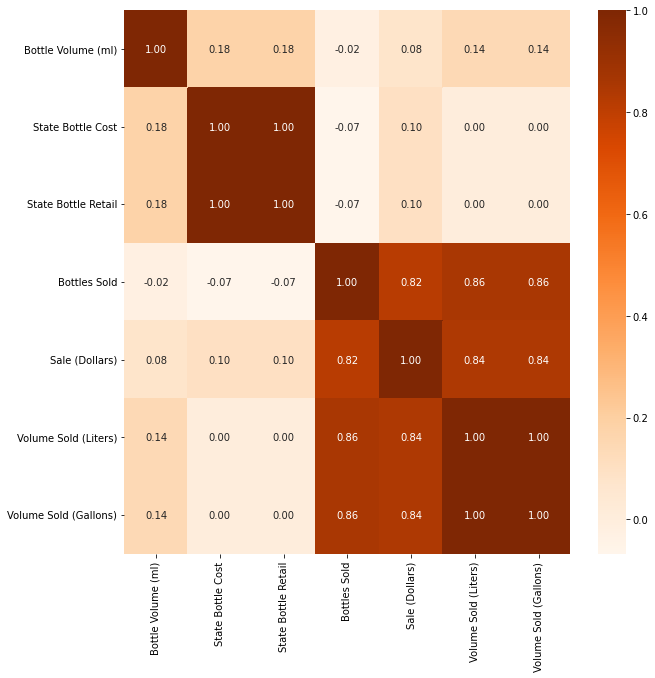

In [55]:
# Let's plot our heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f');

**Conclusions about correlation:**
- According to the plot above:
  - Sale (Dollars):
    - Has a strong correlation with:
      - Bottles Sold = 0.82.
      - Volume Sold (Liters) = 0.84.
      - Volume Sold (Gallons) = 0.84.
  - Volume Sold (Gallons):
    - Has a strong correlation with:
      - Bottles Sold = 0.86.
      - Sale (Dollars) = 0.84.
      - Volume Sold (Liters) = 1.00 (as was expected).
- Because we identinfied a stronger correlation between 'Bottle Sold' and 'Volume Sold (Gallons)' than 'Bottle Sold' and 'Sale (Dollars)', we decided to declare 'Volume Sold (Gallons)' as our Target (y).
  

**Observations:**
- We must keep in mind that:
  - 'Sale (Dollars)' = 'Bottles Sold' x 'State Bottle Retail'
  - 'Volume Sold (Liters)' = 'Bottles Sold' x 'Bottle Volume (ml)'
  - 'Volume Sold (Gallons)' = 'Volume Sold (Liters)' / 3.8
- According to this, the features/variables to evaluate should be:
  - 'State Bottle Retail'.
  - 'Bottles Sold'.
  - 'Sale (Dollars)'.
  - 'Bottle Volume (ml)'.
  - 'Volume Sold (Liters)'.
  - 'Volume Sold (Gallons)'.
- But remember our objective is to predict the sales, Volume Sold (Gallons), for 2022. So:
  - Features to be analyzed individually:
    - 'Sale (Dollars)': feature has an strong correlation (0.84) with our Target.
    - 'Bottles Sold': feature has an strong  correlation (0.86) with our Target.
    - 'Volume Sold (Liters)': feature has an strong correlation (1.00) with our Target.
    - 'Volume Sold (Gallons)': because is the Target.
  - Features won't be analyzed individually, because weak correlation:
    - 'State Bottle Retail'. 
    - 'Bottle Volume (ml)'.

**Next steps:**
1. Add a column to our dataset, named 'State Profit', which will represents the profit that Iowa State makes
  - State Profit = Sale (Dollars) + (State Bottle Cost x Bottles Sold)
2. Create 'pareto_state_profit_df' in order to plot a Pareto Diagram. This way we are going to have a better idea, which products (Category Name) are more profitable.
3. Create 'pareto_bottles_sold_df' to see which product were more sold, using a Pareto Diagram too.
4. Xxxxxx

**STEP 1:**

In [57]:
df.head()

City   County      Category Name            Vendor Name  \
2019 0  IOWA CITY  JOHNSON  Imported Brandies      MOET HENNESSY USA   
     1  IOWA CITY  JOHNSON      Mixto Tequila                PROXIMO   
     2  IOWA CITY  JOHNSON    Scotch Whiskies  SAZERAC NORTH AMERICA   
     3    DUBUQUE  DUBUQUE     American Vodka        Laird & Company   
     4  URBANDALE     POLK     American Vodka              LUXCO INC   

        Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
2019 0                 200               6.24                 9.36   
     1                 500              11.50                17.25   
     2                 375               3.21                 4.82   
     3                1000               4.17                 6.26   
     4                 375               1.86                 2.79   

        Bottles Sold  Sale (Dollars)  Volume Sold (Liters)  \
2019 0            24          224.64                   4.8   
     1            12          207.00                   6.0   
     2            24          115.68                   9.0   
     3            12           75.12                  12.0   
     4            24           66.96                   9.0   

        Volume Sold (Gallons)  
2019 0                   1.26  
     1                   1.58  
     2                   2.37  
     3                   3.17  
     4                   2.37

In [61]:
# Rename columns.
renamed_df = df.rename(columns={'Category Name': 'Category_Name', 'Vendor Name': 'Vendor_Name',
                        'Bottle Volume (ml)':'Bottle_Volume(ml)', 'State Bottle Cost':'State_Bottle_Cost',
                        'State Bottle Retail':'State_Bottle_Retail', 'Bottles Sold':'Bottles_Sold',
                        'Sale (Dollars)':'Sale_(Dollars)','Volume Sold (Liters)':'Volume_Sold(Liters)',
                        'Volume Sold (Gallons)':'Volume_Sold(Gallons)'})
renamed_df.head(5)

City   County      Category_Name            Vendor_Name  \
2019 0  IOWA CITY  JOHNSON  Imported Brandies      MOET HENNESSY USA   
     1  IOWA CITY  JOHNSON      Mixto Tequila                PROXIMO   
     2  IOWA CITY  JOHNSON    Scotch Whiskies  SAZERAC NORTH AMERICA   
     3    DUBUQUE  DUBUQUE     American Vodka        Laird & Company   
     4  URBANDALE     POLK     American Vodka              LUXCO INC   

        Bottle_Volume(ml)  State_Bottle_Cost  State_Bottle_Retail  \
2019 0                200               6.24                 9.36   
     1                500              11.50                17.25   
     2                375               3.21                 4.82   
     3               1000               4.17                 6.26   
     4                375               1.86                 2.79   

        Bottles_Sold  Sale_(Dollars)  Volume_Sold(Liters)  \
2019 0            24          224.64                  4.8   
     1            12          207.00                  6.0   
     2            24          115.68                  9.0   
     3            12           75.12                 12.0   
     4            24           66.96                  9.0   

        Volume_Sold(Gallons)  
2019 0                  1.26  
     1                  1.58  
     2                  2.37  
     3                  3.17  
     4                  2.37

In [ ]:
# Add column 'State Profit'.
df.insert(6,'Debt',df.Card + raw_df.Other) # adapted from http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
df.head(5)

In [ ]:
# Defining aesthetics for our plot.
color1 = 'blue'
color2 = 'orange'
line_size = 4

# Creating a basic bar plot, using Pandas.
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(pareto_df.index, pareto_df['Count'], color=color1)
ax.set(xlabel='Items Type', ylabel='Count', title='Pareto Plot')

# Adding the line that will indicate how the percentage is cumulative.
# Remember that in Pareto, we are looking for the 80% cumulative in order to have the 20% of the items that generate ~80% of the sales.
ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['%Cum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors.
ax.tick_params(axis='y', color=color1)
ax2.tick_params(axis='y', color=color2)

# Now, let's display our amazing plot.
plt.show()

In [ ]:
# Let's graph a barplot to visualize the sales per Store Type hued by Location.
salesbarplot = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', ci=None, palette='autumn_r')
salesbarplot.set(title='Sales per Store Type hued by Location')
salesbarplot.legend(bbox_to_anchor=[1.02,1])
salesbarplot.set_xlabel('Store Type')
salesbarplot.set_ylabel('Sales ($)');


In [ ]:
# Let's see how the moderate correlation that we identified, is related to visibility.
crr = sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Visibility', palette='Oranges')
crr.set_title('Sales Price vs Sales Volume hued with Visibility Index', fontsize=15)
crr.legend(bbox_to_anchor=[1,1], title='Visibility Index')
crr.set_xlabel('Price ($)')
crr.set_ylabel('Sales ($)');

In [ ]:
# Let's graph a barplot with the Series above.
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
     return f"${x*1e-3:,.0f}K"

def plot_dist(data=pareto_filter_df, x='Item_Outlet_Sales', figsize=(18,5), format_pareto=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Graph barplot
    sns.barplot(data=pareto_filter_df, 
            x=sales1_df.values, y=sales1_df.index, ax=ax, color='orange', ci=None)
    ax.set_title('Sales per Product Type', 
             fontfamily='monospace',
             fontsize=20,
             fontweight='semibold')
    ax.set_xlabel('Total Sales')
    ax.set_ylabel('Product Type')


    ## if format_mrp is True use our FuncFormatter
    if format_pareto:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

plot_dist(pareto_filter_df);

In [ ]:
# Let's create our plot.

from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
     return f"${x*1e-3:,.0f}K"

def plot_dist(data=viz_df, x='Value', figsize=(18,5), format_viz=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Graph barplot
    sns.barplot(data=viz_df, 
            x='Value', y='Variable', ax=ax, ci=None)
    ax.set_title('Sales per Strategy', 
             fontfamily='monospace',
             fontsize=20,
             fontweight='semibold')
    ax.set_xlabel('Total Sales')
    ax.set_ylabel('Strategy')


    ## if format_viz is True use our FuncFormatter
    if format_viz:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    return fig,ax

plot_dist(viz_df);

##6.- Data Preparation for Machine Learning

This section will be develop in next stack.

#E. Project Conclusions

- As we displayed in code line [10] and the boxplots, we should make a deep analysis of the outliers and address them. We have maximum values too high.
- We should find a way to export the dataset concatenated in order to have an easier flow on the notebook.
- The graphs plot for categorical were made to comply to the assignment, but having too many categories, we should fins another way to visually explore this features.
- We have to find the error about  the category "Temporary & Specialty Packages" on 'Category Name' is the only only one we couldn't fix it.